In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../data/healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:>

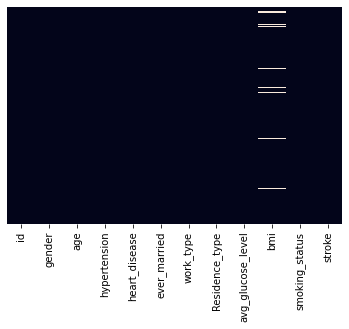

In [4]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

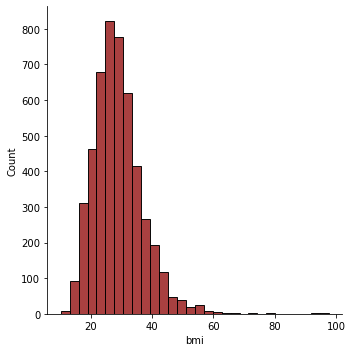

In [6]:
sns.displot(df['bmi'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='age', ylabel='bmi'>

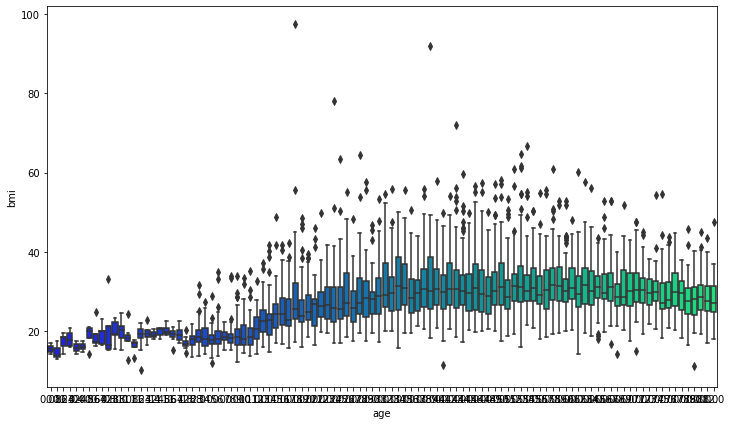

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='age',y='bmi',data=df,palette='winter')

In [10]:
df.drop('bmi',axis=1,inplace=True)

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


In [13]:
def convert_sex(gender):

    if gender == 'Male':
        return 1
    else:
        return 0

In [16]:
df['gender'] = df['gender'].apply(convert_sex)

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


In [18]:
df.drop(['ever_married','Residence_type','smoking_status','work_type'],axis=1,inplace=True)

In [19]:
df.head()

,id,gender,age,hypertension,heart_disease,avg_glucose_level,stroke
0,9046,1,67.0,0,1,228.69,1
1,51676,0,61.0,0,0,202.21,1
2,31112,1,80.0,0,1,105.92,1
3,60182,0,49.0,0,0,171.23,1
4,1665,0,79.0,1,0,174.12,1


In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('stroke',axis=1), 
                                                    df['stroke'], test_size=0.30, 
                                                    random_state=101)

In [24]:
from sklearn.linear_model import LogisticRegression

In [26]:
lgmodel =LogisticRegression()
lgmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()